# Data Manipulation Part 2 - Groupby Transformations and More

We continue working with Pandas groupby operations today and begin exploring Pandas charting capabilities.

First we reprocess some of the data from last time.

In [98]:
import pandas as pd

sf1store = pd.HDFStore('data/bay_sf1_small.h5')

#sf1store = pd.HDFStore('data/bay_sf1_small.h5')
sf1 = sf1store['sf1_extract']
sf1[:5]

,logrecno,blockfips,state,county,tract,blkgrp,block,arealand,P0010001,P0020001,...,H0040003,H0040004,H0050001,H0050002,H0050003,H0050004,H0050005,H0050006,H0050007,H0050008
0,25,060014271001000,06,001,427100,1,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26,060014271001001,06,001,427100,1,1001,79696,113,113,...,1,4,0,0,0,0,0,0,0,0
2,27,060014271001002,06,001,427100,1,1002,739,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,060014271001003,06,001,427100,1,1003,19546,29,29,...,0,7,3,0,0,1,0,0,0,2
4,29,060014271001004,06,001,427100,1,1004,14364,26,26,...,0,6,0,0,0,0,0,0,0,0


Let's calculate some percentages of population by race within each tract from these data.

In [99]:
sf1['pct_black'] = sf1['P0030003'] / sf1['P0030001'] * 100
sf1['pct_asian'] = sf1['P0030005'] / sf1['P0030001'] * 100
sf1['pct_white'] = sf1['P0030002'] / sf1['P0030001'] * 100
sf1['pct_hisp'] = sf1['P0040003'] / sf1['P0040001'] * 100
sf1[:5]

,logrecno,blockfips,state,county,tract,blkgrp,block,arealand,P0010001,P0020001,...,H0050003,H0050004,H0050005,H0050006,H0050007,H0050008,pct_black,pct_asian,pct_white,pct_hisp
0,25,060014271001000,06,001,427100,1,1000,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,26,060014271001001,06,001,427100,1,1001,79696,113,113,...,0,0,0,0,0,0,13.274336,5.309735,78.761062,1.769912
2,27,060014271001002,06,001,427100,1,1002,739,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,28,060014271001003,06,001,427100,1,1003,19546,29,29,...,0,1,0,0,0,2,13.793103,27.586207,37.931034,24.137931
4,29,060014271001004,06,001,427100,1,1004,14364,26,26,...,0,0,0,0,0,0,0.000000,38.461538,34.615385,0.000000


Now add colums with percentage rental and population per square mile.

In [100]:
sf1['pct_rent'] = sf1['H0040004'] / sf1['H0040001'] * 100
sf1['pop_sqmi'] = (sf1['P0010001'] / (sf1['arealand'] / 2589988))
sf1 = sf1[sf1['P0030001']>0]
sf1[:5]

,logrecno,blockfips,state,county,tract,blkgrp,block,arealand,P0010001,P0020001,...,H0050005,H0050006,H0050007,H0050008,pct_black,pct_asian,pct_white,pct_hisp,pct_rent,pop_sqmi
1,26,060014271001001,06,001,427100,1,1001,79696,113,113,...,0,0,0,0,13.274336,5.309735,78.761062,1.769912,80.000000,3672.312839
3,28,060014271001003,06,001,427100,1,1003,19546,29,29,...,0,0,0,2,13.793103,27.586207,37.931034,24.137931,70.000000,3842.712166
4,29,060014271001004,06,001,427100,1,1004,14364,26,26,...,0,0,0,0,0.000000,38.461538,34.615385,0.000000,75.000000,4688.087441
6,31,060014271001006,06,001,427100,1,1006,1281,2,2,...,0,0,0,0,0.000000,50.000000,0.000000,100.000000,100.000000,4043.697112
7,32,060014271001007,06,001,427100,1,1007,19020,30,30,...,0,0,0,0,0.000000,43.333333,50.000000,0.000000,33.333333,4085.154574


In [101]:
sf1['P0010001'].groupby(sf1['county']).sum()

county
001    1510271
013    1049025
041     252409
055     136484
075     805235
081     718451
085    1781642
095     413344
097     483878
Name: P0010001, dtype: int64

In [102]:
county_names = {'001': 'Alameda', '013': 'Contra Costa', '041': 'Marin', '055': 'Napa', '075': 'San Francisco',
                '081': 'San Mateo', '085': 'Santa Clara', '095': 'Solano', '097': 'Sonoma'}

In [103]:
sf1.insert(4, 'county_name', sf1['county'].replace(county_names))
sf1[:5]

,logrecno,blockfips,state,county,county_name,tract,blkgrp,block,arealand,P0010001,...,H0050005,H0050006,H0050007,H0050008,pct_black,pct_asian,pct_white,pct_hisp,pct_rent,pop_sqmi
1,26,060014271001001,06,001,Alameda,427100,1,1001,79696,113,...,0,0,0,0,13.274336,5.309735,78.761062,1.769912,80.000000,3672.312839
3,28,060014271001003,06,001,Alameda,427100,1,1003,19546,29,...,0,0,0,2,13.793103,27.586207,37.931034,24.137931,70.000000,3842.712166
4,29,060014271001004,06,001,Alameda,427100,1,1004,14364,26,...,0,0,0,0,0.000000,38.461538,34.615385,0.000000,75.000000,4688.087441
6,31,060014271001006,06,001,Alameda,427100,1,1006,1281,2,...,0,0,0,0,0.000000,50.000000,0.000000,100.000000,100.000000,4043.697112
7,32,060014271001007,06,001,Alameda,427100,1,1007,19020,30,...,0,0,0,0,0.000000,43.333333,50.000000,0.000000,33.333333,4085.154574


## Transforming Data with Groupby

In some cases you may want to apply a function to your data, by group.  An example would be to normalize a column by a mean of each group.  Say we wanted to subtract the mean population density of each county from the population density of each census block. We could write a function to subtract the mean from each value, and then use the transform operation to apply this to each group:

In [104]:
def demean(arr):
    return arr - arr.mean()

Now we can apply this tranformation to columns in our dataframe.  As examples, let's 'demean' the pop_sqmi and pct_rent columns, subtracting the county-wide mean of these values from the block-specific values, so that the result is transformed to have a mean of zero within each county.

To check the results, we print the means per county, then the original values for the first 5 rows, then the transformed results.  The transformed results we should be able to calculate by subtracting the appropriate county mean from the block value.

In [105]:
normalized = sf1[['pop_sqmi', 'pct_rent']].groupby(sf1['county_name']).transform(demean)
print('County Means')
print(sf1[['pop_sqmi', 'pct_rent']].groupby(sf1['county_name']).mean())

print()
print('First 5 rows, untransformed')
print(sf1[['county_name','pop_sqmi', 'pct_rent']][:5])

print()
print('First 5 rows, transformed')
print(normalized[:5])

County Means
                   pop_sqmi   pct_rent
county_name                           
Alameda        13753.632044  37.484398
Contra Costa    8081.846244  27.223329
Marin           6338.936151  33.169454
Napa            6245.985021  32.903209
San Francisco  28395.093537  51.927943
San Mateo      11011.638488  30.274104
Santa Clara    10598.597545  29.811290
Solano          7203.793038  34.598761
Sonoma          5415.876988  35.121698

First 5 rows, untransformed
  county_name     pop_sqmi    pct_rent
1     Alameda  3672.312839   80.000000
3     Alameda  3842.712166   70.000000
4     Alameda  4688.087441   75.000000
6     Alameda  4043.697112  100.000000
7     Alameda  4085.154574   33.333333

First 5 rows, transformed
       pop_sqmi   pct_rent
1 -10081.319205  42.515602
3  -9910.919878  32.515602
4  -9065.544603  37.515602
6  -9709.934932  62.515602
7  -9668.477470  -4.151064


We can merge these transformed results on to the original DataFrame, and check the means of the original variables and the tranformed ones.  The transformed ones should be arbitrarily close to zero.

In [106]:
sf2 = pd.merge(sf1,normalized, left_index=True, right_index=True)

sf2.groupby('county_name')[['pop_sqmi_x', 'pop_sqmi_y', 'pct_rent_x', 'pct_rent_y']].mean()

,pop_sqmi_x,pop_sqmi_y,pct_rent_x,pct_rent_y
county_name,,,,
Alameda,13753.632044,-7.944529e-11,37.484398,6.856168e-14
Contra Costa,8081.846244,-7.040712e-12,27.223329,-3.800049e-13
Marin,6338.936151,1.461176e-12,33.169454,9.143583e-15
Napa,6245.985021,-1.304992e-13,32.903209,-1.685373e-14
San Francisco,28395.093537,6.833338e-12,51.927943,-1.349699e-15
San Mateo,11011.638488,8.192330e-12,30.274104,-7.197617e-14
Santa Clara,10598.597545,5.347880e-11,29.811290,-1.211290e-13
Solano,7203.793038,9.815285e-12,34.598761,-5.029091e-14
Sonoma,5415.876988,1.308518e-11,35.121698,-5.937600e-14


Apply is a method we have learned previously, which allows us to apply a function to each row in a DataFrame.  We can also combine apply with groupby to apply functions based on group membership.  For example, the function 'top' sorts an array and selects the top n rows from it.  We provide some defaults for the arguments of how many rows, and the column to use for the selection:

In [90]:
def top(df, n=5, column='pop_sqmi'):
    return df.sort_values(by=column, ascending=False).head(n)

Using this on the full dataset and setting the number of rows and the column to get the top values for, in this case using pct_rent to override the default argument, we get the top 10 blocks in the region in terms of percentage rental.

In [91]:
top(sf1, n=10, column='pct_rent')

,logrecno,blockfips,state,county,county_name,tract,blkgrp,block,arealand,P0010001,...,H0050005,H0050006,H0050007,H0050008,pct_black,pct_asian,pct_white,pct_hisp,pct_rent,pop_sqmi
55399,593009,060750352022006,06,075,San Francisco,035202,2,2006,5420,38,...,0,0,0,0,0.000000,18.421053,68.421053,2.631579,100.0,18158.587454
55283,592876,060750332043011,06,075,San Francisco,033204,3,3011,19179,160,...,0,0,0,0,10.000000,18.125000,50.625000,23.750000,100.0,21606.865843
55270,592862,060750332042000,06,075,San Francisco,033204,2,2000,3140,7,...,0,0,0,0,0.000000,100.000000,0.000000,0.000000,100.0,5773.858599
55271,592863,060750332042001,06,075,San Francisco,033204,2,2001,70847,1480,...,0,2,0,2,6.824324,34.054054,47.567568,12.364865,100.0,54105.074880
55273,592866,060750332043001,06,075,San Francisco,033204,3,3001,46198,41,...,0,0,0,0,9.756098,14.634146,48.780488,19.512195,100.0,2298.573704
55277,592870,060750332043005,06,075,San Francisco,033204,3,3005,15537,85,...,0,0,0,0,9.411765,30.588235,44.705882,14.117647,100.0,14169.336423
55278,592871,060750332043006,06,075,San Francisco,033204,3,3006,2013,2,...,0,0,0,0,0.000000,0.000000,100.000000,0.000000,100.0,2573.261798
55279,592872,060750332043007,06,075,San Francisco,033204,3,3007,22700,697,...,0,2,0,3,4.304161,42.467719,39.885222,13.199426,100.0,79525.182203
55280,592873,060750332043008,06,075,San Francisco,033204,3,3008,21981,211,...,0,1,0,1,5.213270,26.540284,47.867299,19.431280,100.0,24861.811019
55281,592874,060750332043009,06,075,San Francisco,033204,3,3009,15863,137,...,0,0,0,0,6.569343,29.927007,48.175182,17.518248,100.0,22368.300826


Below we apply this with groupby and use the defaults for n and column, and it applies the function within each county and concatenates the results, producing the top 5 blocks on pop_sqmi for each county in the region.

In [54]:
sf1.groupby('county_name').apply(top)

logrecno        blockfips state county    county_name  \
county_name                                                                   
Alameda       8494        9073  060014311002003    06    001        Alameda   
              4786        5117  060014419251004    06    001        Alameda   
              19003      20241  060014028002013    06    001        Alameda   
              9130        9766  060014351042022    06    001        Alameda   
              9702       10388  060014369001004    06    001        Alameda   
Contra Costa  37338      56116  060133551151034    06    013   Contra Costa   
              27063      45017  060133150001190    06    013   Contra Costa   
              25628      43440  060133131021012    06    013   Contra Costa   
              27062      45016  060133150001170    06    013   Contra Costa   
              27904      45921  060133340042011    06    013   Contra Costa   
Marin         46754     316228  060411302021012    06    041          Marin   
              46762     316236  060411302021020    06    041          Marin   
              46748     316222  060411302021006    06    041          Marin   
              44846     314094  060411220001000    06    041          Marin   
              45030     314297  060411060013037    06    041          Marin   
Napa          47380     355511  060552010032003    06    055           Napa   
              47402     355533  060552010032026    06    055           Napa   
              48190     356373  060552005051002    06    055           Napa   
              48904     357165  060552003013027    06    055           Napa   
              48388     356588  060552007043003    06    055           Napa   
San Francisco 55230     592818  060750332031009    06    075  San Francisco   
              50114     587161  060750125011003    06    075  San Francisco   
              56373     594081  060750611002003    06    075  San Francisco   
              49731     586709  060750105002008    06    075  San Francisco   
              50073     587114  060750124012001    06    075  San Francisco   
San Mateo     60283     625772  060816102021046    06    081      San Mateo   
              60573     626075  060816103042020    06    081      San Mateo   
              60370     625862  060816102032006    06    081      San Mateo   
              63541     629335  060816016011005    06    081      San Mateo   
              63840     629667  060816008003006    06    081      San Mateo   
Santa Clara   68422     646761  060855080013002    06    085    Santa Clara   
              72470     651175  060855113011005    06    085    Santa Clara   
              73117     651856  060855002002002    06    085    Santa Clara   
              75335     654276  060855031084002    06    085    Santa Clara   
              73520     652286  060855009022000    06    085    Santa Clara   
Solano        90767     701757  060952524014012    06    095         Solano   
              90347     701314  060952523122011    06    095         Solano   
              97423     708802  060952509001009    06    095         Solano   
              90421     701392  060952523133040    06    095         Solano   
              91166     702183  060952526081007    06    095         Solano   
Sonoma        106920    719441  060971514023013    06    097         Sonoma   
              106731    719231  060971533001020    06    097         Sonoma   
              104931    717285  060971516023063    06    097         Sonoma   
              104670    717002  060971514025003    06    097         Sonoma   
              106928    719450  060971514024003    06    097         Sonoma   

                       tract  blkgrp block  arealand  P0010001  ...  H0050005  \
county_name                                                     ...             
Alameda       8494    431100       2  2003       320       392  ...         0   
              4786    441925       1  1004      1240       801  .

Here we pass arguments to the function to set n and the column to select the top value from.

In [107]:
sf1.groupby('county_name').apply(top, n=1, column='arealand')

,,logrecno,blockfips,state,county,county_name,tract,blkgrp,block,arealand,P0010001,...,H0050005,H0050006,H0050007,H0050008,pct_black,pct_asian,pct_white,pct_hisp,pct_rent,pop_sqmi
county_name,,,,,,,,,,,,,,,,,,,,,,
Alameda,12544,13434,060014301021000,06,001,Alameda,430102,1,1000,31296322,166,...,0,0,0,3,1.204819,3.614458,84.337349,6.024096,45.283019,13.737653
Contra Costa,37789,56579,060133551121158,06,013,Contra Costa,355112,1,1158,19441925,141,...,0,2,0,3,2.127660,0.709220,75.886525,24.822695,23.809524,18.783547
Marin,42773,311828,060411322003008,06,041,Marin,132200,3,3008,48884156,112,...,0,14,6,0,0.000000,0.892857,64.285714,66.071429,91.666667,5.934002
Napa,47066,355191,060552018001000,06,055,Napa,201800,1,1000,93228090,13,...,0,4,1,2,0.000000,0.000000,92.307692,0.000000,83.333333,0.361156
San Francisco,56139,593833,060750604001013,06,075,San Francisco,060400,1,1013,1036262,3,...,0,0,0,0,0.000000,33.333333,66.666667,0.000000,NaN,7.498069
San Mateo,57660,622919,060816138001035,06,081,San Mateo,613800,1,1035,28976148,105,...,0,0,0,4,0.952381,0.000000,47.619048,60.952381,55.172414,9.385262
Santa Clara,66451,644610,060855135001202,06,085,Santa Clara,513500,1,1202,277483160,62,...,0,3,0,1,3.225806,0.000000,82.258065,1.612903,16.666667,0.578699
Solano,92499,703629,060952527026009,06,095,Solano,252702,6,6009,30318073,14,...,0,1,0,0,0.000000,35.714286,64.285714,0.000000,33.333333,1.195981
Sonoma,99632,711527,060971542022000,06,097,Sonoma,154202,2,2000,35658559,106,...,0,14,0,1,0.000000,0.000000,89.622642,14.150943,36.585366,7.699098


## Experimenting with Rental Listings Merged with SF1

Let's read the geocoded rental listings for the Bay Area to begin.  We will make sure the fips_block column is read as a string dtype so we can merge properly with the census data.  It has leading zeros and is a string in the census data.

In [108]:
rentals = pd.read_csv('data/sfbay_geocoded.csv', usecols=['rent', 'bedrooms', 'sqft', 'fips_block', 'longitude', 'latitude'], dtype={'fips_block': str})
rentals[:5]

,rent,bedrooms,sqft,longitude,latitude,fips_block
0,4500.0,2.0,1200.0,-122.438300,37.745000,060750216002015
1,2650.0,2.0,1040.0,-122.008131,37.353699,060855085053008
2,3100.0,2.0,1000.0,-122.439743,37.731584,060750311005011
3,1850.0,1.0,792.0,-122.234294,37.491715,060816101001026
4,1325.0,1.0,642.0,-122.087751,37.923448,060133400021004


And merge it with the census data using the FIPS block codes, which are named differently in the two DataFrames.

In [109]:
rentals_sf1 = pd.merge(rentals, sf1, left_on='fips_block', right_on='blockfips')
rentals_sf1[:10]

,rent,bedrooms,sqft,longitude,latitude,fips_block,logrecno,blockfips,state,county,...,H0050005,H0050006,H0050007,H0050008,pct_black,pct_asian,pct_white,pct_hisp,pct_rent,pop_sqmi
0,4500.0,2.0,1200.0,-122.438300,37.745000,060750216002015,589261,060750216002015,06,075,...,0,3,0,5,23.445826,10.301954,46.358792,23.268206,88.888889,24936.524053
1,6250.0,3.0,1215.0,-122.438300,37.745000,060750216002015,589261,060750216002015,06,075,...,0,3,0,5,23.445826,10.301954,46.358792,23.268206,88.888889,24936.524053
2,6250.0,3.0,1215.0,-122.438300,37.745000,060750216002015,589261,060750216002015,06,075,...,0,3,0,5,23.445826,10.301954,46.358792,23.268206,88.888889,24936.524053
3,6650.0,3.0,2900.0,-122.440088,37.745296,060750216002015,589261,060750216002015,06,075,...,0,3,0,5,23.445826,10.301954,46.358792,23.268206,88.888889,24936.524053
4,2600.0,1.0,615.0,-122.440088,37.745296,060750216002015,589261,060750216002015,06,075,...,0,3,0,5,23.445826,10.301954,46.358792,23.268206,88.888889,24936.524053
5,2615.0,1.0,615.0,-122.440088,37.745296,060750216002015,589261,060750216002015,06,075,...,0,3,0,5,23.445826,10.301954,46.358792,23.268206,88.888889,24936.524053
6,2615.0,1.0,615.0,-122.440088,37.745296,060750216002015,589261,060750216002015,06,075,...,0,3,0,5,23.445826,10.301954,46.358792,23.268206,88.888889,24936.524053
7,2600.0,1.0,615.0,-122.440088,37.745296,060750216002015,589261,060750216002015,06,075,...,0,3,0,5,23.445826,10.301954,46.358792,23.268206,88.888889,24936.524053
8,3200.0,NaN,900.0,-122.438300,37.745000,060750216002015,589261,060750216002015,06,075,...,0,3,0,5,23.445826,10.301954,46.358792,23.268206,88.888889,24936.524053
9,2600.0,1.0,615.0,-122.440088,37.745296,060750216002015,589261,060750216002015,06,075,...,0,3,0,5,23.445826,10.301954,46.358792,23.268206,88.888889,24936.524053


Now we can begin looking at this merged dataset.  Let's start by computing mean rents by county.

In [110]:
county_rents = rentals_sf1.groupby(rentals_sf1['county_name'])[['rent']].mean().sort_values(by='rent', ascending=False)
county_rents

,rent
county_name,
San Francisco,3746.737974
Marin,3277.287562
San Mateo,2857.011248
Santa Clara,2665.584276
Alameda,2235.584293
Napa,2117.797398
Contra Costa,1955.075348
Sonoma,1805.140760
Solano,1359.965551


### Built-in Pandas Bar Charts

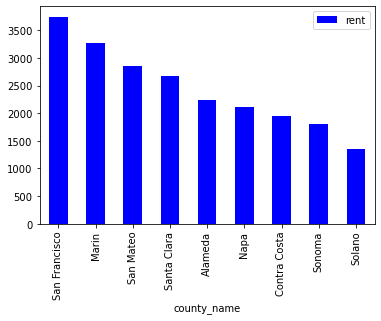

In [111]:
%matplotlib inline

county_rents.plot(kind='bar', color='b')

Those patterns generally conform to our expectations, with San Francisco highest and Solano lowest.

Let's examine these patterns by county and number of bedrooms. We can just use two columns in the groupby to do this.

In [112]:
rentals_sf1.groupby(['county_name', 'bedrooms'])[['rent']].mean()

rent
county_name bedrooms             
Alameda     1.0       1862.396037
            2.0       2284.538409
            3.0       2715.874074
            4.0       3315.346895
            5.0       4820.488152
...                           ...
Sonoma      2.0       1830.113469
            3.0       2284.307937
            4.0       2738.465347
            5.0       3037.500000
            6.0       3295.000000

[61 rows x 1 columns]

That output is a bit too long, since there are rows for many bedroom counts (and few units have > 6 bedrooms!).  Let's trim this by looking only at units with less than 4 bedrooms.

In [113]:
rentals_sf1[rentals_sf1['bedrooms']<4].groupby(['county_name', 'bedrooms'])[['rent']].mean()

rent
county_name   bedrooms             
Alameda       1.0       1862.396037
              2.0       2284.538409
              3.0       2715.874074
Contra Costa  1.0       1596.991079
              2.0       1874.641106
              3.0       2390.508197
Marin         1.0       2209.910211
              2.0       2998.448575
              3.0       4476.835979
Napa          1.0       1387.362745
              2.0       1846.914110
              3.0       2447.333333
San Francisco 1.0       3099.179065
              2.0       4225.756604
              3.0       5151.170096
San Mateo     1.0       2266.792148
              2.0       2975.375058
              3.0       3888.506952
Santa Clara   1.0       2143.095373
              2.0       2721.721386
              3.0       3451.772947
Solano        1.0       1143.470514
              2.0       1277.712283
              3.0       1640.565678
Sonoma        1.0       1403.868078
              2.0       1830.113469
              3.0       2284.307937

Let's plot a bar chart of these rents by county and bedroom.

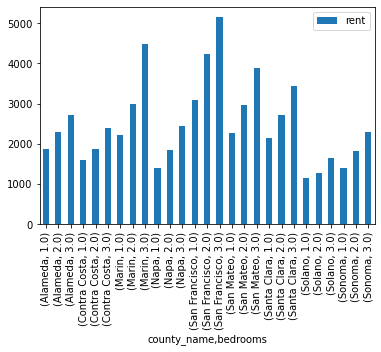

In [62]:
rentals_sf1[rentals_sf1['bedrooms']<4].groupby(['county_name', 'bedrooms'])[['rent']].mean().plot(kind='bar')

That bar chart is not ideal. Too small, and it would be nicer to make it separate colors for each number of bedrooms.  Notice that we have a hierarchical index (county, then bedrooms within county).  We can use unstack on this to make it easier to work with for the bar charts, or even to look at as a table:

In [114]:
rentals_sf1[rentals_sf1['bedrooms']<4].groupby(['county_name', 'bedrooms'])[['rent']].mean().unstack()

rent                          
bedrooms               1.0          2.0          3.0
county_name                                         
Alameda        1862.396037  2284.538409  2715.874074
Contra Costa   1596.991079  1874.641106  2390.508197
Marin          2209.910211  2998.448575  4476.835979
Napa           1387.362745  1846.914110  2447.333333
San Francisco  3099.179065  4225.756604  5151.170096
San Mateo      2266.792148  2975.375058  3888.506952
Santa Clara    2143.095373  2721.721386  3451.772947
Solano         1143.470514  1277.712283  1640.565678
Sonoma         1403.868078  1830.113469  2284.307937

Now we can plot a bar chart with the unstacked data, and add a title and set the figure size.

Note that in one line of code we can filter, groupby, and plot our results.

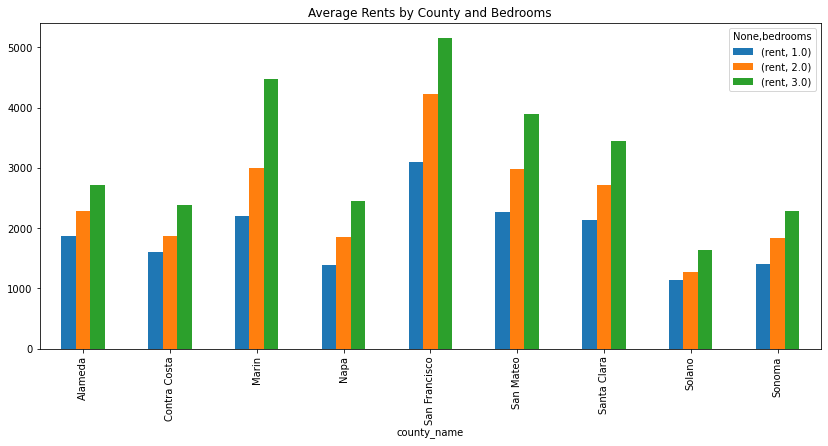

In [64]:
rentals_sf1[rentals_sf1['bedrooms']<4].groupby(['county_name', 'bedrooms'])[['rent']].mean().unstack().plot(kind='bar', figsize=(14,6), title='Average Rents by County and Bedrooms')

Pandas also provides a syntax for doing this that is familiar for spreadsheet users: the pivot_table.  You can see below that using pivot_table achieves exactly the same result.  

In [95]:
pd.pivot_table(rentals_sf1[rentals_sf1['bedrooms']<4], values='rent', index=['county_name'], columns=['bedrooms'])

bedrooms,1.0,2.0,3.0
county_name,,,
Alameda,1862.396037,2284.538409,2715.874074
Contra Costa,1596.991079,1874.641106,2390.508197
Marin,2209.910211,2998.448575,4476.835979
Napa,1387.362745,1846.914110,2447.333333
San Francisco,3099.179065,4225.756604,5151.170096
San Mateo,2266.792148,2975.375058,3888.506952
Santa Clara,2143.095373,2721.721386,3451.772947
Solano,1143.470514,1277.712283,1640.565678
Sonoma,1403.868078,1830.113469,2284.307937


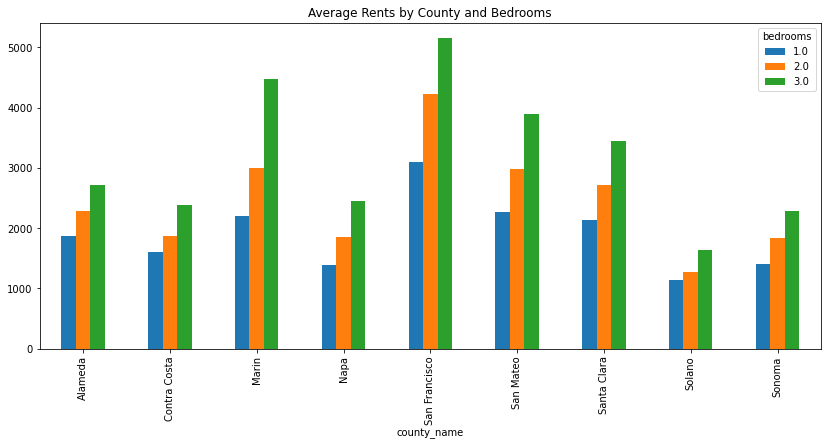

In [115]:
pd.pivot_table(rentals_sf1[rentals_sf1['bedrooms']<4], values='rent', index=['county_name'], columns=['bedrooms']).plot(kind='bar', figsize=(14,6), title='Average Rents by County and Bedrooms')

In addition to providing a convenience interface to groupby, pivot_table also can add partial totals, or margins.

In [67]:
pd.pivot_table(rentals_sf1[rentals_sf1['bedrooms']<4], values='rent', index=['county_name'], columns=['bedrooms'], margins=True)

bedrooms,1.0,2.0,3.0,All
county_name,,,,
Alameda,1862.396037,2284.538409,2715.874074,2161.681932
Contra Costa,1596.991079,1874.641106,2390.508197,1856.947814
Marin,2209.910211,2998.448575,4476.835979,3061.734740
Napa,1387.362745,1846.914110,2447.333333,1999.539130
San Francisco,3099.179065,4225.756604,5151.170096,3861.692972
San Mateo,2266.792148,2975.375058,3888.506952,2801.402538
Santa Clara,2143.095373,2721.721386,3451.772947,2590.512772
Solano,1143.470514,1277.712283,1640.565678,1300.941814
Sonoma,1403.868078,1830.113469,2284.307937,1775.032962


Although mean is the default type of aggregation in pivot_table, you can use other methods like len, to get a frequency crosstab with the count of observations in each cell of the table, as well as the margins.  Let's remove the filter on number of bedrooms to see the full frequency distribution.

In [68]:
pd.pivot_table(rentals_sf1, values='rent', index=['county_name'], columns=['bedrooms'], aggfunc=len, margins=True)

bedrooms,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,All
county_name,,,,,,,,,
Alameda,4290.0,4361.0,1350.0,467.0,211.0,28.0,4.0,1.0,10712.0
Contra Costa,2242.0,3508.0,976.0,629.0,177.0,33.0,4.0,1.0,7570.0
Marin,568.0,807.0,378.0,176.0,15.0,2.0,NaN,NaN,1946.0
Napa,102.0,163.0,195.0,64.0,5.0,NaN,NaN,NaN,529.0
San Francisco,2245.0,2120.0,729.0,207.0,15.0,4.0,1.0,1.0,5322.0
San Mateo,2598.0,2141.0,935.0,199.0,55.0,5.0,NaN,NaN,5933.0
Santa Clara,7413.0,8973.0,2484.0,945.0,237.0,11.0,7.0,1.0,20071.0
Solano,797.0,1498.0,472.0,188.0,32.0,NaN,10.0,NaN,2997.0
Sonoma,614.0,1225.0,315.0,101.0,4.0,1.0,NaN,NaN,2260.0


A simpler way to generate a crosstabulation is also built in to pandas: the crosstab method.

In [69]:
pd.crosstab(rentals_sf1['county_name'], rentals_sf1['bedrooms'], margins=True)

bedrooms,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,All
county_name,,,,,,,,,
Alameda,4290,4361,1350,467,211,28,4,1,10712
Contra Costa,2242,3508,976,629,177,33,4,1,7570
Marin,568,807,378,176,15,2,0,0,1946
Napa,102,163,195,64,5,0,0,0,529
San Francisco,2245,2120,729,207,15,4,1,1,5322
San Mateo,2598,2141,935,199,55,5,0,0,5933
Santa Clara,7413,8973,2484,945,237,11,7,1,20071
Solano,797,1498,472,188,32,0,10,0,2997
Sonoma,614,1225,315,101,4,1,0,0,2260


Besides the simpler syntax, the other advantage of crosstab for doing this is that you can normalize the crosstab, dividing all the cell values by the grand total.  This tells us the fraction of the region's total listings that are in each combination of county and number of bedrooms.

In [97]:
pd.crosstab(rentals_sf1['county_name'], rentals_sf1['bedrooms'], margins=True, normalize=True)

bedrooms,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,All
county_name,,,,,,,,,
Alameda,0.074817,0.076055,0.023544,0.008144,0.003680,0.000488,0.000070,0.000017,0.186815
Contra Costa,0.039100,0.061179,0.017021,0.010970,0.003087,0.000576,0.000070,0.000017,0.132020
Marin,0.009906,0.014074,0.006592,0.003069,0.000262,0.000035,0.000000,0.000000,0.033938
Napa,0.001779,0.002843,0.003401,0.001116,0.000087,0.000000,0.000000,0.000000,0.009226
San Francisco,0.039152,0.036972,0.012714,0.003610,0.000262,0.000070,0.000017,0.000017,0.092815
San Mateo,0.045309,0.037339,0.016306,0.003471,0.000959,0.000087,0.000000,0.000000,0.103471
Santa Clara,0.129281,0.156488,0.043321,0.016481,0.004133,0.000192,0.000122,0.000017,0.350035
Solano,0.013900,0.026125,0.008232,0.003279,0.000558,0.000000,0.000174,0.000000,0.052267
Sonoma,0.010708,0.021364,0.005494,0.001761,0.000070,0.000017,0.000000,0.000000,0.039414


We have the option to normalize on the index, which is the county_name in this case, so we see the fraction of the county listings that are of each number of bedrooms.  The rows sum to 1.

In [71]:
pd.crosstab(rentals_sf1['county_name'], rentals_sf1['bedrooms'], margins=True, normalize='index')

bedrooms,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
county_name,,,,,,,,
Alameda,0.400485,0.407114,0.126027,0.043596,0.019698,0.002614,0.000373,0.000093
Contra Costa,0.296169,0.463408,0.128930,0.083091,0.023382,0.004359,0.000528,0.000132
Marin,0.291881,0.414697,0.194245,0.090442,0.007708,0.001028,0.000000,0.000000
Napa,0.192817,0.308129,0.368620,0.120983,0.009452,0.000000,0.000000,0.000000
San Francisco,0.421834,0.398346,0.136979,0.038895,0.002818,0.000752,0.000188,0.000188
San Mateo,0.437890,0.360863,0.157593,0.033541,0.009270,0.000843,0.000000,0.000000
Santa Clara,0.369339,0.447063,0.123761,0.047083,0.011808,0.000548,0.000349,0.000050
Solano,0.265933,0.499833,0.157491,0.062729,0.010677,0.000000,0.003337,0.000000
Sonoma,0.271681,0.542035,0.139381,0.044690,0.001770,0.000442,0.000000,0.000000


The counterpart is to normalize by column, in which case we see the fraction of 1 bedroom listings in the region that are in each county, and so on for different bedroom counts.


In [72]:
pd.crosstab(rentals_sf1['county_name'], rentals_sf1['bedrooms'], margins=True, normalize='columns')

bedrooms,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,All
county_name,,,,,,,,,
Alameda,0.205568,0.175875,0.172326,0.156922,0.280959,0.333333,0.153846,0.25,0.186815
Contra Costa,0.107432,0.141474,0.124585,0.211358,0.235686,0.392857,0.153846,0.25,0.132020
Marin,0.027217,0.032546,0.048251,0.059140,0.019973,0.023810,0.000000,0.00,0.033938
Napa,0.004888,0.006574,0.024891,0.021505,0.006658,0.000000,0.000000,0.00,0.009226
San Francisco,0.107576,0.085498,0.093056,0.069556,0.019973,0.047619,0.038462,0.25,0.092815
San Mateo,0.124491,0.086345,0.119352,0.066868,0.073236,0.059524,0.000000,0.00,0.103471
Santa Clara,0.355216,0.361873,0.317079,0.317540,0.315579,0.130952,0.269231,0.25,0.350035
Solano,0.038191,0.060413,0.060250,0.063172,0.042610,0.000000,0.384615,0.00,0.052267
Sonoma,0.029422,0.049403,0.040209,0.033938,0.005326,0.011905,0.000000,0.00,0.039414


What if we want to look at more statistics than just mean? We can combine several aggregation methods and compute them at one time.

In [73]:
rentals_sf1[rentals_sf1['bedrooms']<4].groupby(['county_name', 'bedrooms'])[['rent']].agg(['mean', 'std', 'min', 'max'])

rent                              
                               mean          std     min      max
county_name   bedrooms                                           
Alameda       1.0       1862.396037   393.300923   500.0   4950.0
              2.0       2284.538409   534.999766   800.0   4998.0
              3.0       2715.874074   806.606556   350.0   7500.0
Contra Costa  1.0       1596.991079   375.069796   496.0   3125.0
              2.0       1874.641106   505.719679   689.0   3895.0
              3.0       2390.508197   775.568225   793.0   5995.0
Marin         1.0       2209.910211   618.305211   430.0   5600.0
              2.0       2998.448575   950.448793  1325.0   9500.0
              3.0       4476.835979  1423.768448  1657.0   9000.0
Napa          1.0       1387.362745   224.556583   750.0   1800.0
              2.0       1846.914110   500.127260   850.0   4050.0
              3.0       2447.333333   997.897308  1250.0   9775.0
San Francisco 1.0       3099.179065   720.636564   725.0   7500.0
              2.0       4225.756604  1284.521670   750.0   9800.0
              3.0       5151.170096  1738.374226  1600.0  10250.0
San Mateo     1.0       2266.792148   411.746679   880.0   5000.0
              2.0       2975.375058   612.783070   832.0   6500.0
              3.0       3888.506952  1192.532121  1800.0  10000.0
Santa Clara   1.0       2143.095373   451.835127   550.0   5202.0
              2.0       2721.721386   664.622785   900.0   9065.0
              3.0       3451.772947  1013.365050   650.0   9999.0
Solano        1.0       1143.470514   214.261987   590.0   1849.0
              2.0       1277.712283   238.327602   799.0   2300.0
              3.0       1640.565678   408.047945   950.0   4500.0
Sonoma        1.0       1403.868078   280.041020   550.0   3200.0
              2.0       1830.113469   363.751789   995.0   4500.0
              3.0       2284.307937   545.081841  1200.0   5000.0

Remember the 'top' function we defined earlier? We can use it here to get the top rental listing in each county, for each bedroom size.

In [74]:
rentals_sf1.groupby(['county_name', 'bedrooms']).apply(top, n=1, column='rent')

rent  bedrooms    sqft   longitude   latitude  \
county_name bedrooms                                                          
Alameda     1.0      29483  4950.0       1.0   800.0 -122.280400  37.836500   
            2.0      36889  4998.0       2.0  1400.0 -122.264292  37.879443   
            3.0      58544  7500.0       3.0  2500.0 -122.226934  37.830734   
            4.0      43448  8200.0       4.0  3247.0 -122.229400  37.828817   
            5.0      22134  7800.0       5.0  1856.0 -122.266723  37.863312   
...                            ...       ...     ...         ...        ...   
Sonoma      2.0      57190  4500.0       2.0  1800.0 -122.420998  38.242798   
            3.0      43260  5000.0       3.0  1800.0 -123.037300  38.330900   
            4.0      58319  4850.0       4.0  3932.0 -122.678661  38.232416   
            5.0      41918  3750.0       5.0  3320.0 -122.586050  38.244525   
            6.0      60559  3295.0       6.0  3400.0 -122.637792  38.463417   

                                 fips_block  logrecno        blockfips state  \
county_name bedrooms                                                           
Alameda     1.0      29483  060014251041007     18519  060014251041007    06   
            2.0      36889  060014216004005      2094  060014216004005    06   
            3.0      58544  060014261001000     25365  060014261001000    06   
            4.0      43448  060014261001006     25371  060014261001006    06   
            5.0      22134  060014235001001      3192  060014235001001    06   
...                                     ...       ...              ...   ...   
Sonoma      2.0      57190  060971501003025    721599  060971501003025    06   
            3.0      43260  060971543024017    715003  060971543024017    06   
            4.0      58319  060971511003001    714770  060971511003001    06   
            5.0      41918  060971506112012    713335  060971506112012    06   
            6.0      60559  060971526002043    718340  060971526002043    06   

                           county  ... H0050005 H0050006  H0050007 H0050008  \
county_name bedrooms               ...                                        
Alameda     1.0      29483    001  ...        0        0         0        0   
            2.0      36889    001  ...        1        6         0        1   
            3.0      58544    001  ...        0        0         0        0   
            4.0      43448    001  ...        0        0         0        1   
            5.0      22134    001  ...        0        0         0        0   
...                           ...  ...      ...      ...       ...      ...   
Sonoma      2.0      57190    097  ...        0        1         0        0   
            3.0      43260    097  ...        1       63         1        6   
            4.0      58319    097  ...        2        7         0        4   
            5.0      41918    097  ...        0        0         0        0   
            6.0      60559    097  ...        0        0         0        0   

                            pct_black  pct_asian   pct_white   pct_hisp  \
county_name bedrooms                                                      
Alameda     1.0      29483  57.142857  14.285714   28.571429   0.000000   
            2.0      36889   0.000000  15.841584   76.237624   8.910891   
            3.0      58544   1.298701  23.376623   74.025974   1.298701   
            4.0      43448   1.351351  29.054054   58.783784   6.081081   
            5.0      22134   0.000000   0.000000  100.000000   0.000000   
...                               ...        ...         ...        ...   
Sonoma      2.0      57190   0.000000   0.000000   62.857143  40.000000   
            3.0      43260   0.000000   4.391892   83.108108  20.945946   
            4.0      58319   0.954654   0.477327   93.078759   2.863962   
            5.0      41918   0.719424   7.194245   88.489209   5.035971   
            6.0      60559   0.00

## Exploring Correlations in the Data

Pandas provides simple ways of computing correlation coefficients among the columns in your DataFrame.  If you use corr() on a full DF, it will produce a large correlation table.  A bit hard to navigate and you mostly would not be interested in some of these results.

In [116]:
rentals_sf1.corr()

,rent,bedrooms,sqft,longitude,latitude,logrecno,blkgrp,arealand,P0010001,P0020001,...,H0050005,H0050006,H0050007,H0050008,pct_black,pct_asian,pct_white,pct_hisp,pct_rent,pop_sqmi
rent,1.000000,0.481234,0.616653,-0.189488,-0.208624,0.185653,-0.011133,-0.002037,-0.116857,-0.116857,...,0.058702,0.087468,-0.015596,0.010655,-0.222322,0.073785,0.191424,-0.290056,-0.137076,0.020475
bedrooms,0.481234,1.000000,0.819533,0.035085,0.065029,-0.039371,0.028106,0.051052,-0.120218,-0.120218,...,-0.016908,-0.078880,-0.014990,-0.034599,-0.000024,-0.014917,0.040864,-0.035118,-0.330290,-0.125802
sqft,0.616653,0.819533,1.000000,0.009677,0.041737,-0.016225,0.008702,0.075221,-0.113589,-0.113589,...,-0.002828,-0.044212,-0.009650,-0.031854,-0.045550,-0.010680,0.090546,-0.105976,-0.331541,-0.132978
longitude,-0.189488,0.035085,0.009677,1.000000,-0.548065,-0.130319,-0.098020,-0.043462,0.094442,0.094442,...,-0.065529,-0.109002,0.030678,-0.099010,-0.023140,0.235135,-0.284017,0.156813,-0.067935,-0.072233
latitude,-0.208624,0.065029,0.041737,-0.548065,1.000000,-0.306019,0.069752,0.080858,-0.105149,-0.105149,...,0.020884,0.033156,0.010343,0.072333,0.265711,-0.407035,0.253876,-0.003537,-0.013489,-0.011506
logrecno,0.185653,-0.039371,-0.016225,-0.130319,-0.306019,1.000000,0.050819,-0.011586,0.020363,0.020363,...,0.002664,0.022854,-0.029056,-0.085817,-0.245896,0.140300,-0.032165,0.055755,0.069324,0.069862
blkgrp,-0.011133,0.028106,0.008702,-0.098020,0.069752,0.050819,1.000000,-0.001086,-0.018809,-0.018809,...,-0.025691,0.041022,-0.009702,-0.023974,-0.039342,0.005227,0.018223,-0.009363,0.015964,0.030694
arealand,-0.002037,0.051052,0.075221,-0.043462,0.080858,-0.011586,-0.001086,1.000000,0.069781,0.069781,...,0.031964,0.079438,0.011564,0.030822,-0.038112,-0.063535,0.094328,-0.026265,-0.084488,-0.087006
P0010001,-0.116857,-0.120218,-0.113589,0.094442,-0.105149,0.020363,-0.018809,0.069781,1.000000,1.000000,...,0.114451,0.188282,0.086167,0.175744,0.018317,0.203882,-0.231680,0.056364,0.278962,0.206183
P0020001,-0.116857,-0.120218,-0.113589,0.094442,-0.105149,0.020363,-0.018809,0.069781,1.000000,1.000000,...,0.114451,0.188282,0.086167,0.175744,0.018317,0.203882,-0.231680,0.056364,0.278962,0.206183


It is easy to compute correlation coeffients for a subset of columns.

In [117]:
rentals_sf1[['rent', 'sqft']].corr()

,rent,sqft
rent,1.000000,0.616653
sqft,0.616653,1.000000


And this method can be combined with groupby to compute correlation tables by group.

In [77]:
rentals_sf1.groupby('county_name')[['rent', 'sqft']].corr()

rent      sqft
county_name                           
Alameda       rent  1.000000  0.784616
              sqft  0.784616  1.000000
Contra Costa  rent  1.000000  0.688621
              sqft  0.688621  1.000000
Marin         rent  1.000000  0.799108
              sqft  0.799108  1.000000
Napa          rent  1.000000  0.711565
              sqft  0.711565  1.000000
San Francisco rent  1.000000  0.740660
              sqft  0.740660  1.000000
San Mateo     rent  1.000000  0.816791
              sqft  0.816791  1.000000
Santa Clara   rent  1.000000  0.771930
              sqft  0.771930  1.000000
Solano        rent  1.000000  0.816569
              sqft  0.816569  1.000000
Sonoma        rent  1.000000  0.823559
              sqft  0.823559  1.000000

In [78]:
rentals_sf1[rentals_sf1['bedrooms']<4].groupby('bedrooms')[['rent', 'sqft']].corr()

rent      sqft
bedrooms                         
1.0      rent  1.000000  0.350723
         sqft  0.350723  1.000000
2.0      rent  1.000000  0.485617
         sqft  0.485617  1.000000
3.0      rent  1.000000  0.445744
         sqft  0.445744  1.000000

## Quantile and Bucket Analysis

We use below the cut method to create categories for ranges of a variable.  In this example we use 4 even intevals using cut.  If we used qcut instead, it would generate quantiles for us.

In [118]:
factor = pd.cut(rentals_sf1['sqft'], 4)
factor[:5]

0    (216.064, 1455.0]
1    (216.064, 1455.0]
2    (216.064, 1455.0]
3     (2689.0, 3923.0]
4    (216.064, 1455.0]
Name: sqft, dtype: category
Categories (4, interval[float64]): [(216.064, 1455.0] < (1455.0, 2689.0] < (2689.0, 3923.0] < (3923.0, 5157.0]]

Define a function to get grouped statistics.

In [80]:
def get_stats(group):
    return{'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean()}

Apply the function to the DataFrame for a specified column.

In [119]:
grouped = rentals_sf1['rent'].groupby(factor)
grouped.apply(get_stats).unstack()

,min,max,count,mean
sqft,,,,
"(216.064, 1455.0]",350.0,8500.0,53054.0,2317.507521
"(1455.0, 2689.0]",295.0,10200.0,7003.0,3742.959732
"(2689.0, 3923.0]",750.0,10250.0,983.0,5334.371312
"(3923.0, 5157.0]",1300.0,10000.0,163.0,5913.877301


## Your turn to experiment

Try practicing these techniques on your own, to do the following:

* Calculate the mean sqft of rental listings by county
* Calculate the standard deviation (std) of sqft of rental listings by county and bedroom
* Add a new column with a normalized sqft, substracting the mean sqft by bedroom from each listing's sqft 
* Compute correlation coefficients among rent, sqft, pct_white, pct_black, pct_asian and pct_hisp, by county and for the region
* Redo the statistical profile on rents by categories of sqft range using 10 quantiles rather than 4 equal bins
